## <font color = 'blue'> NAME: Devin McMurrey </font>
## <font color = 'blue'> Submission Date: 12/7/2021 </font>
## <font color = 'blue'> Examination # 3 - Fall 2021

# <font color='red'> GRADE: 
</font>

## <font color = 'blue'> GRADING COMMENTS: <font color='red'>()</font>
    
<font color='blue' size = 2>

<ol>
    
    
</ol>

</font>

<font color='blue'>

### Program Name : Sales Data Breakdown Examination # 3 - Fall 2021
</font>

In [109]:
def get_sales_data():
    '''Retrieves CSV files and bulk reads data into separate data frames'''
    
    import pandas as pd
    
    FILE_PATH = 'users/cis5357/exams/'
    
    client_file = FILE_PATH + 'Clients.csv'
    transactions_file = FILE_PATH + 'Transactions.csv'
    
    df_client = pd.read_csv(client_file)
    df_transactions = pd.read_csv(transactions_file)
    
    df_sales_unclean = merge_data(df_client,df_transactions)
    
    return df_sales_unclean

In [243]:
def merge_data(df_client, df_transactions):
    '''merges dataframes invoked from get_sales_data function combines them on custid'''
    import pandas as pd
    
    df_sales_unclean = pd.merge(df_client, df_transactions, on = 'custid', how = 'outer')
    
    return df_sales_unclean

In [244]:
def clean_up_sales_data(df_sales_unclean):
    '''Modifies data frames for desired analysis metrics'''
    import pandas as pd 
    from pandas.api.types import is_datetime64_any_dtype
    
    df_sales = df_sales_unclean.drop(['address','city','zipcode','invid'], axis = 1)
   
    df_sales = df_sales.dropna()
    
    df_sales.rename(columns = {'custid':'customer id','custname':'name','invdate':'date of sale','cost':'cost of product sold','sales':'sales amount'}, inplace=True)
    
    if df_sales['cost of product sold'].dtypes != float:
        df_sales['cost of product sold'] = df_sales['cost of product sold'].astype(float)
    
    if df_sales['sales amount'].dtypes != float:
        df_sales['sales amount'] = df_sales['sales amount'].astype(float)
    
    if is_datetime64_any_dtype(df_sales['date of sale']) == False:
        df_sales['date of sale'] = pd.to_datetime(df_sales['date of sale']) 
       
    return df_sales

In [245]:
def compute_data(df_sales):
    '''Receive clean populated dtat and manipulate it to so data frame contains new information'''
     
    df_sales['net profit USD']  = round(df_sales['sales amount'] - df_sales['cost of product sold'],2)
    
    exchange_rate_aud = get_exchange_rate()
    
    df_sales['net profit AUD'] = round(exchange_rate_aud * df_sales['net profit USD'],2)
    
    display(df_sales) 
    
    return df_sales

In [246]:
def get_exchange_rate():
    '''gets exhange rerate by navigating API'''
    import json
    import requests
    
    url = 'https://api.exchangerate.host/convert?from=USD&to=AUD'
    response = requests.get(url)
    exchange_rate = json.loads(response.text)
    
    exchange_rate_aud = exchange_rate['info']['rate']
    
    return exchange_rate_aud

In [247]:
def prepare_basic_analysis(df_sales):
    '''Void function which receives manipulated data structure and prepares information sets'''

    df_lowest10 = lowest_10_cust_netprofit(df_sales)
    display(df_lowest10)#pulled out display so i could invoke lowest_10_cust_netprofit in data_visualization function without getting duplicate tables
    totat_transactions_and_netprofit(df_sales)
    sales_by_state(df_sales)

In [248]:
def lowest_10_cust_netprofit(df_sales):
    '''querys and displays 10 customers names assoced with lowest net profit'''

    df_lowest10 = df_sales.groupby('name').agg({'net profit AUD':'sum'})
    df_lowest10 = df_lowest10.sort_values(by=['net profit AUD'])
    df_lowest10 = df_lowest10.head(10)
    
    return df_lowest10
    

In [249]:
def totat_transactions_and_netprofit(df_sales):
    '''displays total number of transactoins and net profit in AUD for the company'''

    total_sales_count = len(df_sales.index)
    total_net_profit_aud = df_sales['net profit AUD'].sum()                
    print(f'The total number of transactions for this time period is:   {total_sales_count}')
    
    total_net_profit_usa = df_sales['net profit USD'].sum()
    
    
    total_net_profit_aud = round(total_net_profit_aud,2)
    
    total_net_profit_aud = "$" + str(total_net_profit_aud)
    print(f'\nThe total net profit in AUD is:     {total_net_profit_aud:>28}')

In [250]:
def sales_by_state(df_sales):
    '''displays sales data by state, specifically those whose sales are under 20% net profit'''
    
    df_states = df_sales.groupby('state').agg({'net profit AUD':'sum'})
    df_states = df_states.sort_values(by=['net profit AUD'])
    twenty_percent_net_profit = df_sales['net profit AUD'].sum()/5
    df_states_under_threshhold = df_states[df_states['net profit AUD']<twenty_percent_net_profit]
    display(df_states_under_threshhold)

In [251]:
def data_visualization(df_sales):
    '''Represent the desired data visually in vertical stack display using seaborn style charts'''
    import matplotlib
    import matplotlib.pyplot as plt
    %matplotlib inline
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    
    plt.style.use('seaborn')
    
    df_lowest10 = lowest_10_cust_netprofit(df_sales)
      
    count_per_date = df_sales.groupby("date of sale").count()
    min_count_per_date = min(count_per_date['sales amount'])
    max_count_per_date = max(count_per_date['sales amount'])  
    
    
    min_net_profit_aud = min(df_lowest10['net profit AUD'])
    max_net_profit_aud = max(df_lowest10['net profit AUD'])                         
    fig1 = plt.figure()
 
    fig1, (graph_a, graph_b) = plt.subplots(2,1, figsize=(40,65), dpi = 120)
    
    graph_a.yaxis.set_minor_locator(AutoMinorLocator(4))
    graph_a.minorticks_on
    graph_a.grid(True, which='both', linewidth=4, color='white')
    graph_a.set_title('Lowest Net Profit Customers', fontsize = 40)
    graph_a.set_xlabel('Customers', fontsize= 35)
    graph_a.set_ylabel('Net Profit AUD', fontsize= 35)
    graph_a.set_ylim([min_net_profit_aud-.5, max_net_profit_aud +.5])
    graph_a.tick_params(axis = 'y', labelsize=20, direction ='out', length=10)
    graph_a.tick_params(axis = 'x', direction='out', length=10, rotation=45, labelsize=25)
    graph_a.bar(df_lowest10.index, df_lowest10['net profit AUD'], color='green')
    
    
    graph_b.set_title('Time Series of Sales Over Period', fontsize = 40)
    graph_b.set_xlabel('Date of Sale ', fontsize= 35)
    graph_b.set_ylabel('Number of Sales', fontsize= 35)
    graph_b.set_ylim([min_count_per_date-1,max_count_per_date+2])
    graph_b.tick_params(axis = 'y', labelsize=20, direction ='out', length=10)
    graph_b.tick_params(axis = 'x', direction='out', length=10, rotation=45, labelsize=20)
    
    graph_b.xaxis.set_minor_locator(AutoMinorLocator(15))
    graph_b.yaxis.set_minor_locator(AutoMinorLocator(2))
    graph_b.minorticks_on
    
    graph_b.grid(True, which='both', linewidth=3, color='white')
    graph_b.plot(count_per_date.index, count_per_date['sales amount'], color='blue', marker = 's', markersize= 10, linestyle = '-.')
    
    plt.show();

In [252]:
def main():
    '''invokes all funcitons and drives logic for program'''
    df_sales_unclean = get_sales_data()
    df_sales = clean_up_sales_data(df_sales_unclean)
    df_sales = compute_data(df_sales)
    prepare_basic_analysis(df_sales)
    data_visualization(df_sales)
    print('\n Normal Termination of the Application')

,customer id,name,state,date of sale,cost of product sold,sales amount,net profit USD,net profit AUD
9,10,Ajith Johnson,CA,2015-11-13,237.5,264.0625,26.56,37.53
10,10,Ajith Johnson,CA,2015-11-19,57.5,65.5625,8.06,11.39
11,10,Ajith Johnson,CA,2015-11-24,57.5,65.5625,8.06,11.39
12,10,Ajith Johnson,CA,2015-11-26,57.5,65.5625,8.06,11.39
13,10,Ajith Johnson,CA,2015-12-09,56.5,64.4875,7.99,11.29
14,11,John Patwardhan,PA,2015-11-13,57.5,65.5625,8.06,11.39
15,11,John Patwardhan,PA,2015-11-13,57.5,65.5625,8.06,11.39
16,11,John Patwardhan,PA,2015-11-26,42.0,48.9000,6.90,9.75
18,13,Nadine Nichols,AR,2015-11-13,57.5,65.5625,8.06,11.39
20,15,Allison Nguyen,TN,2015-11-13,57.5,65.5625,8.06,11.39


,net profit AUD
name,
Richard Bommareddy,11.29
Mariola Galloway,11.29
Kim Howell,11.29
Eric Taliaferro,11.39
Nadine Nichols,11.39
Jeffrey Wu,11.39
Charles Monse,11.39
Wayne Wen,11.39
Chang Loyal,11.39


The total number of transactions for this time period is:   39

The total net profit in AUD is:                           $673.5


,net profit AUD
state,
WA,11.29
AR,11.39
FL,11.39
NJ,11.39
MI,19.03
NM,26.90
UT,26.90
IL,30.53
TX,30.53


<Figure size 576x396 with 0 Axes>

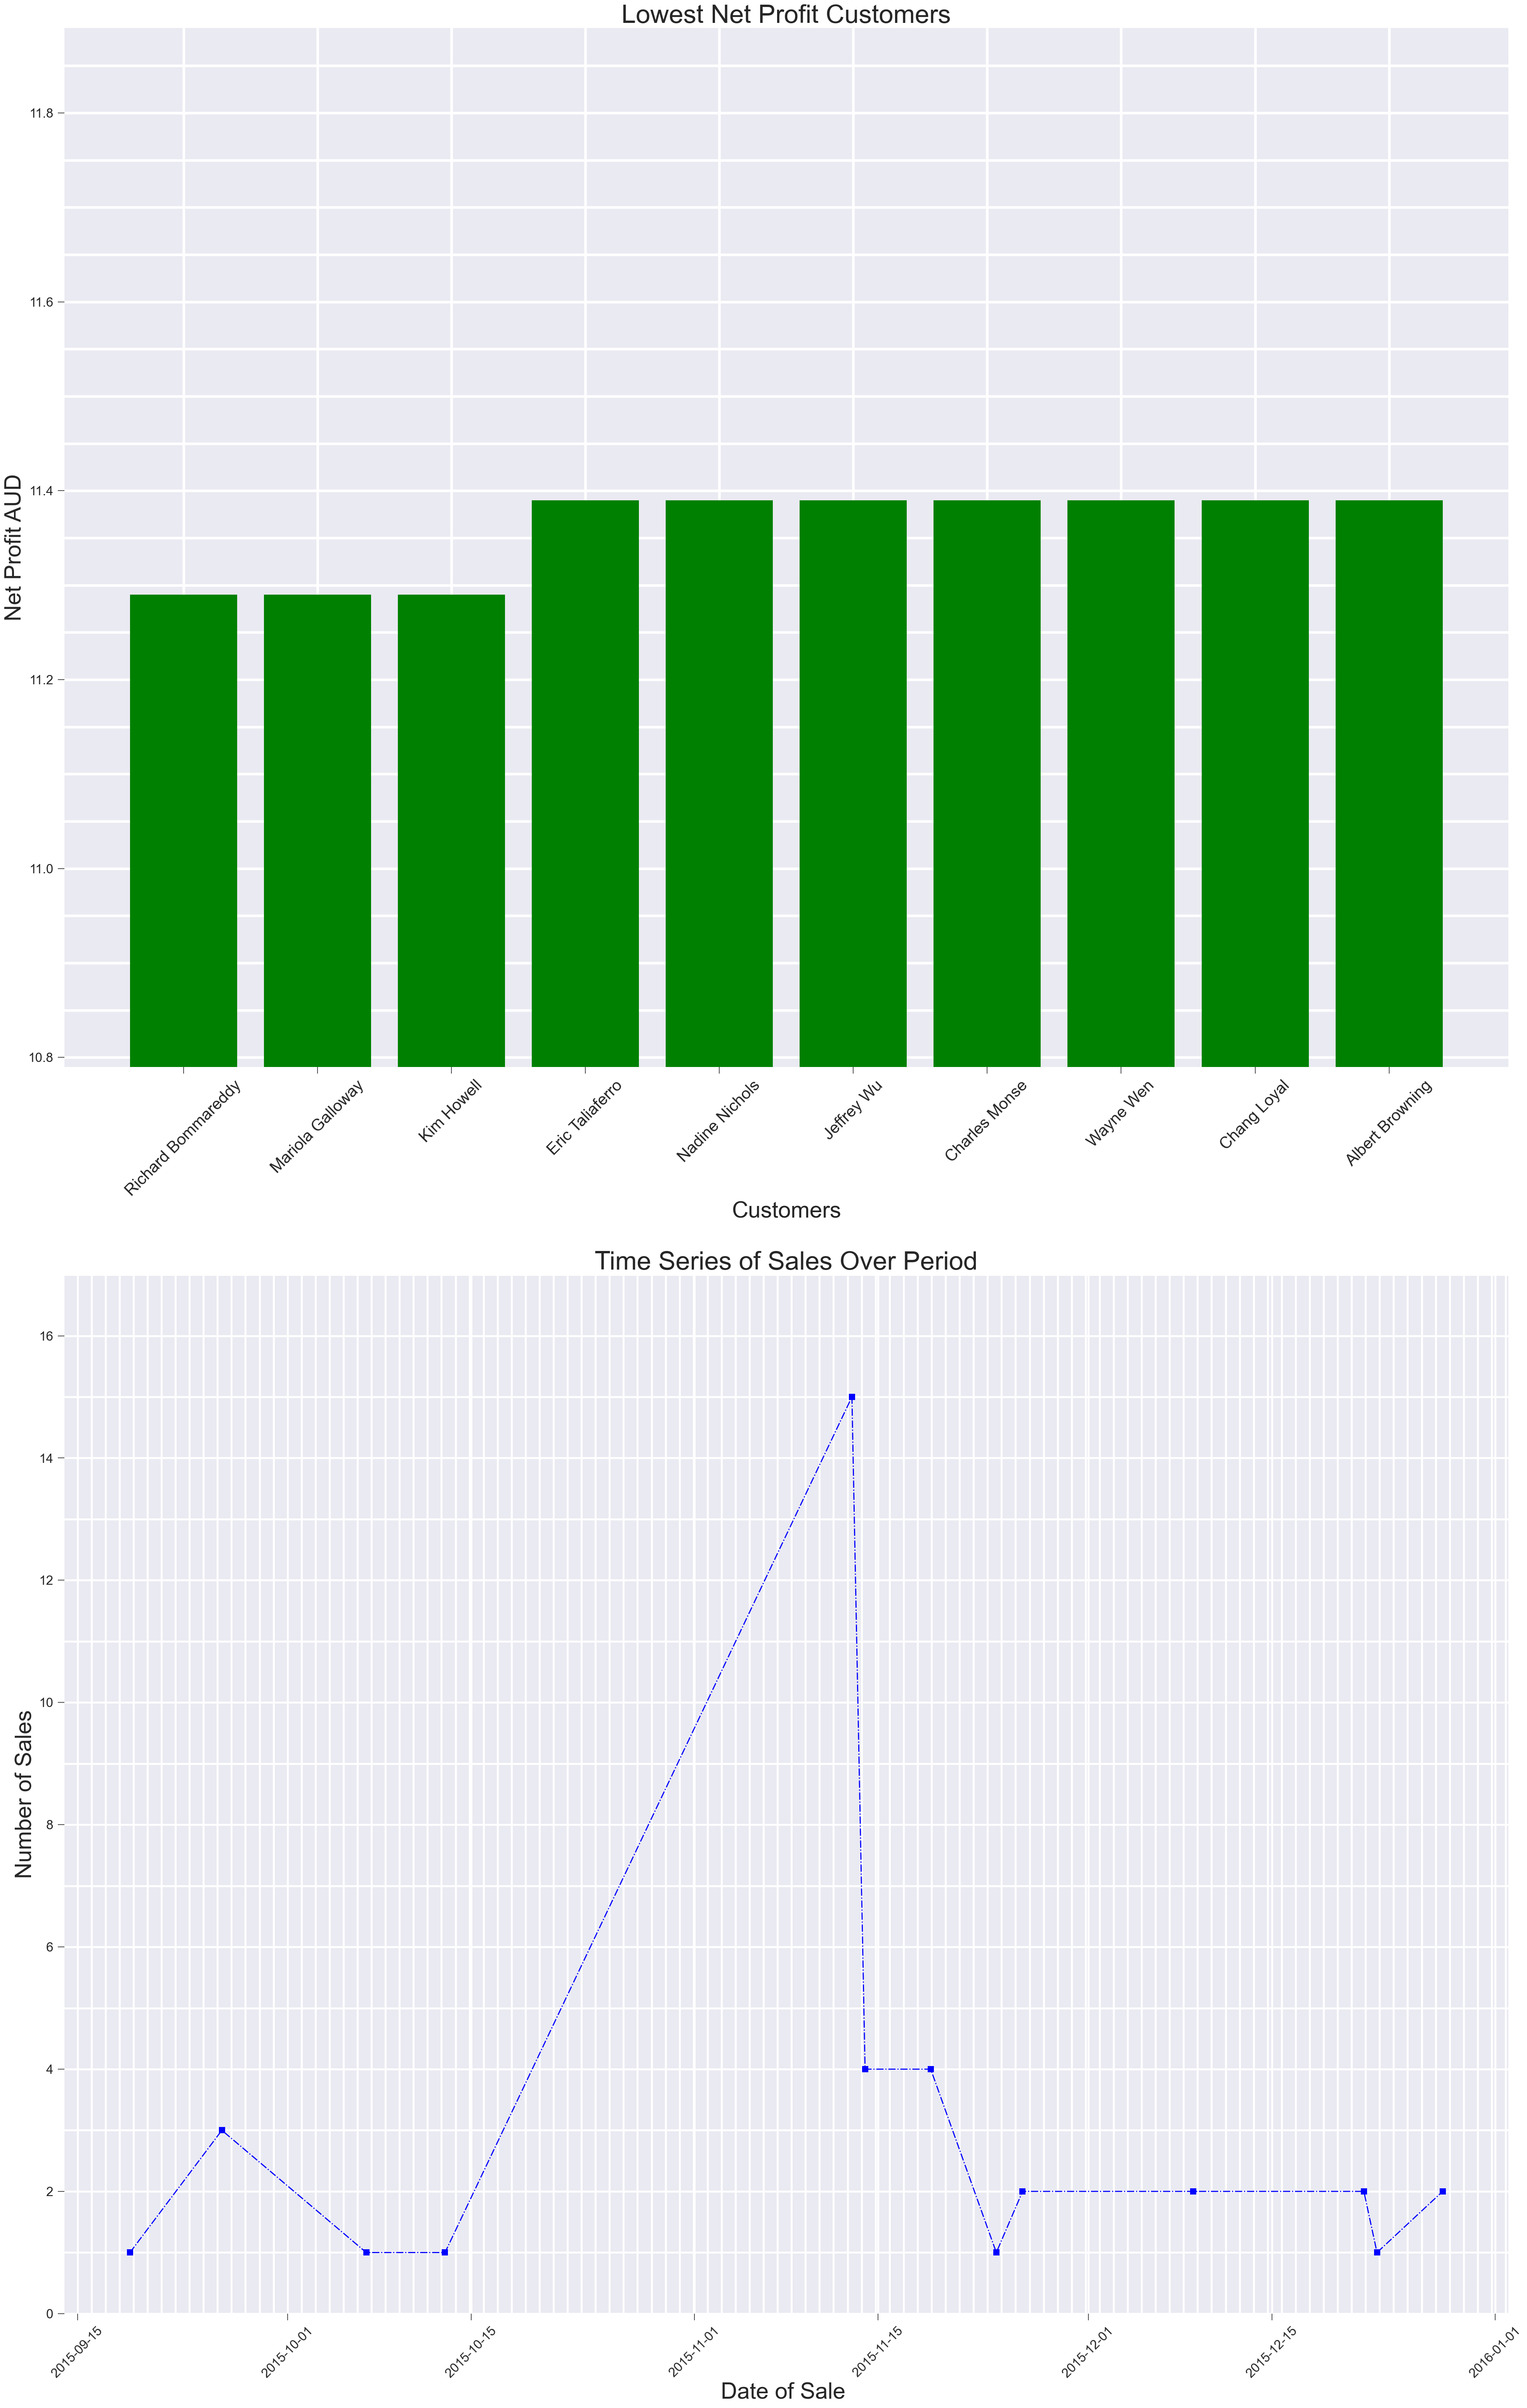


 Normal Termination of the Application


In [253]:
main()